# Download data and take a look at it

In [275]:
# After creating the workspace and finnaly running jupyter we need to get data we are going to work with.
# So there is a function to do it automatically

In [152]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
# Calling function to get data

fetch_housing_data()

In [153]:
#To load downloaded data to Panda we need one more function

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#This function returns a Pandas DataFrame object, which contains all the data

In [276]:
#Calling function to load data to Panda and printing out 5 first ones

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [277]:
#Calling info() function gets you a description of the data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [156]:
# All of attributes in this data set is numerical except "ocean-proximity" attribute
# And if we take a look at those 5 first rows of data set, we can see that "ocean_proximity" collumn was repetitive
# which means that it is probably a categorical attribute
# value_counts() method let us find out what categories exist and how many districts belong to each of those

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [157]:
# To get a summary of the numerical attributes we can use a describe() method

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


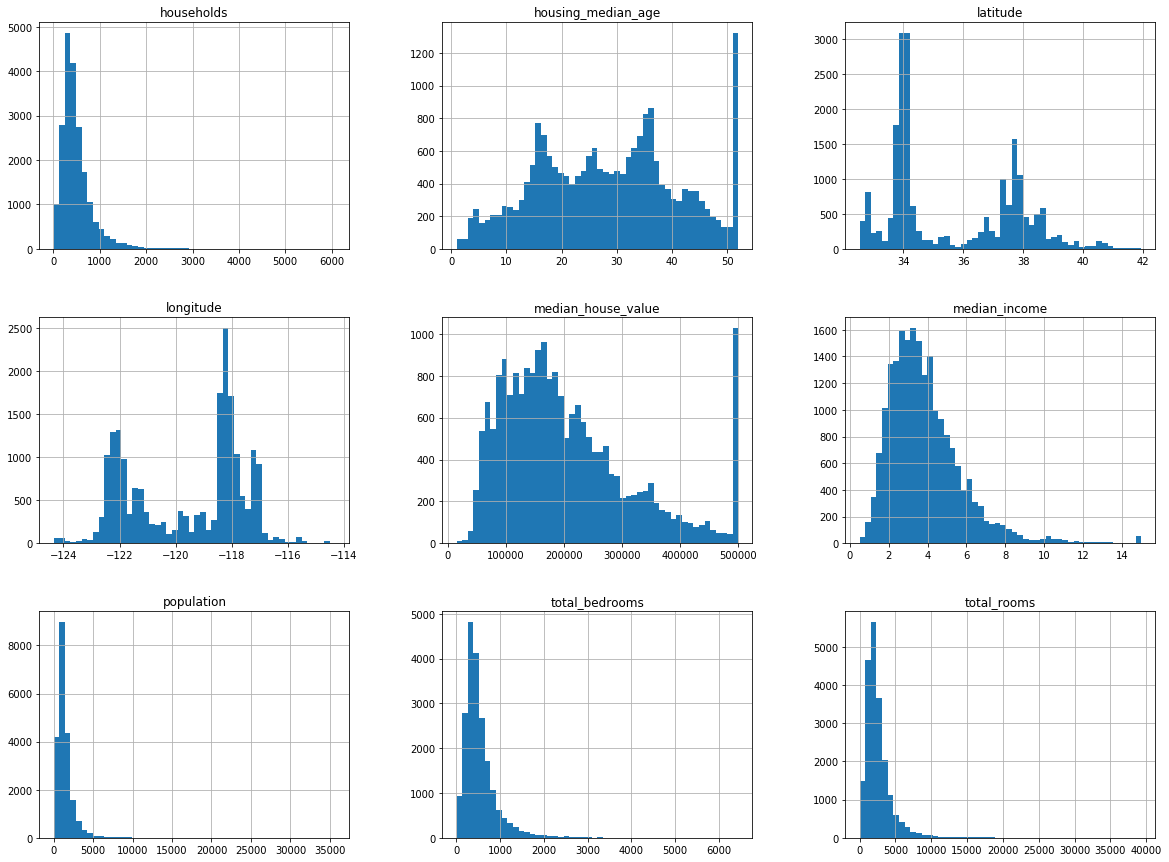

In [158]:
# And to get even better insight of data we are going to be dealing with, we can use call a hist() method
# which will plot a histogram for each numerical attribute

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Create a test set

In [159]:
# We need to split our dataset to train_set and test_set, train set is going to be used to train the ML algorithm
# and we are not going to use our test_set until we are actual finished with whole algorithm
# 20% of the whole data set is going to be put aside as a test_set
# We only do this for the ilustration and better understanding why and how this has to be done
# sklearn already has train_test_split()

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [278]:
#Splitting the data set

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train + ", len(test_set), "test")

# It works, but if we run this program again, it will create a new test_set which is different from the first one
# to avoid that we could use few different methods but all of them will brake when we fetch or update our dataset

16512 train +  4128 test


In [161]:
# So the best solution for this is to decide if a instance should go to test_set or not
# We could hash each instance's identifier and use the last byte of hash to test whether or not it should go to test_set

import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256*test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [162]:
#since our data set doesn't have indentifier column, we can use row index as ID
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [163]:
# While using hashing we open ourselves to a new problem,
# we need to be sure that new data added dataset is only added to the end of dataset and no row gets deleted
# And if that's not possible, we could create a unique identifier using most stable features of dataset 
# Which in this case are longitude and latitude 

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [ ]:
# or instead of stressing ourselves out with hashing and combining features into an ID
# we can implement "cyclic redundancy check" which is stable and works fine with bot Py2 an Py3

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [164]:
# sklearn train_test_split does exactly the same thing as split_train_test we created earlier with few extra features
# there is a random_state parameter, so that it always generates the same shuffled indices
# and we can pass it multiple datasets which has identical number of rows and will split them on the same indices

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

In [279]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16656,-120.66,35.27,33.0,1664.0,455.0,1077.0,461.0,1.6875,174200.0,NEAR OCEAN
10505,-117.72,33.43,5.0,1889.0,359.0,616.0,246.0,3.8992,500001.0,<1H OCEAN
18265,-122.07,37.37,22.0,3770.0,727.0,1657.0,762.0,4.8021,457500.0,NEAR BAY
8423,-118.35,33.93,25.0,2260.0,692.0,1603.0,673.0,2.1100,223300.0,<1H OCEAN
7303,-118.19,33.98,40.0,973.0,272.0,1257.0,258.0,2.8214,158000.0,<1H OCEAN


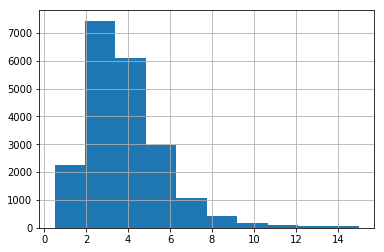

In [280]:
housing["median_income"].hist()

In [283]:
# So we get to know that the median_income is a pretty important attribute which we should use
# As we see in the histogram above, there are many median_income categories and this histogram is one of the heavy tail
# So to decrease the amount of categories, we divide them by 1.5
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

#and label those above 5 as 5 
housing["income_cat"].where(housing["income_cat"]< 5, 5.0, inplace=True)

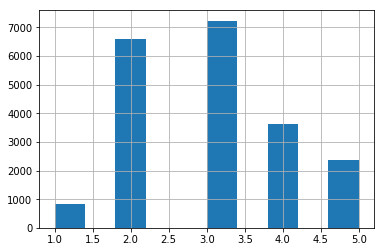

In [285]:
#Lets make a histogram of income_cat attribute

housing["income_cat"].hist()

In [287]:
# and we can now do stratified sampling based of freshly created income category

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [288]:
# and we take a look of how did it work
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [289]:
# and compare it to proportions of the full data set
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [168]:
#After comparing them we can see they are almost identical
# So we can now remove the income_cat attribute so the tada is back to original

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and visualise the data to gain insights

In [169]:
# Now it's time to put test_set aside and go a little deeper working with our train_set
# In cases where data set is huge it is smart to sample only a part of it, but our data set is quate small
# We are just going to create a copy of our tran_set, so we can use it without doing any harm to the original one

housing = strat_train_set.copy()

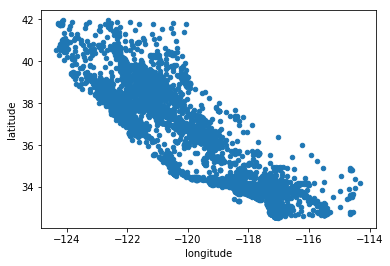

In [290]:
# Since we are working with geographical information it is a good idea to visualize some of the data
# We can create a scttarplot of all of the districts 

housing.plot(kind="scatter", x="longitude", y="latitude")

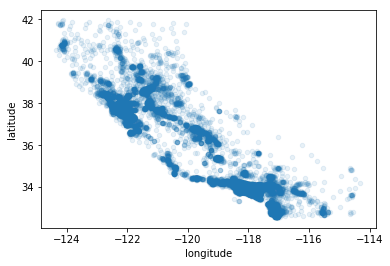

In [291]:
# It is hard to see any particular pattern in the scatterplot above
# To get a better insight of most populated areas, we can set the alpha option to 0.1

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

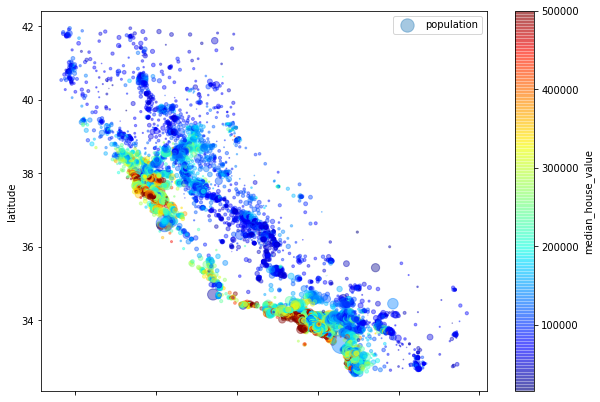

In [294]:
# We can use a predifined color map called jet to take a look at housing prices
# for that we set option c which is color to "meadian_house_value" and option s which is district's population
# We are using predifined color map which is cmap to range the prices from high(red) to low(blue)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

In [295]:
# We can easily create a correlation matrix using corr() method

corr_matrix = housing.corr()

In [173]:
#and take a look at how each attribute correlates with median_house_value

corr_matrix["median_house_value"].sort_values(ascending=False)

# the correlation coefficient ranges from -1 to 1
# Coefficient that is closer to 1 shows as that there is strong positive corr between that attribute and median_house_value
# and as coefficient get closer to -1 it shows stronger negative corr between these two attributes
# if coefficient is close or is 0, it means that there is no linear correlation between those two

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029600897780>,
      dtype=object)

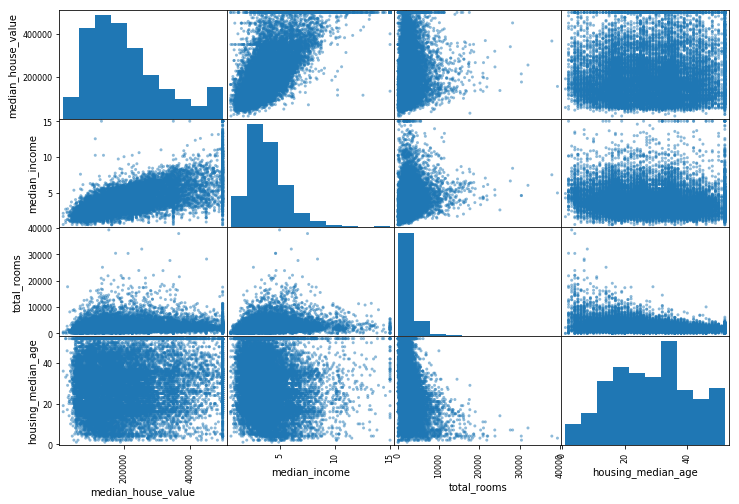

In [174]:
# another way of testing correlations is using Pandas' scatter_matrix function
# it plots every numerical attribute against every other numerical attribute
# and as we have 11 attributes, we would get 11^2=121 plots which is way too many to fit in a screen
# so instead of looking at all of those, we we can focus on some of
# most promising attributes which seems to correlate most to median_house_value 

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

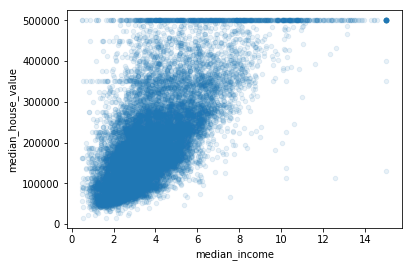

In [175]:
# And it looks like the most promising attribute is mediena_income attribute

housing.plot(kind ="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [176]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [177]:
# Before we prepare our data for machine learning algorithms we may want to test out some combinations of attributes, 
# for example total amount of rooms per district doesn't give us any good insinght of data, so we could try to find out
# how many rooms there are per household
# or how many bedrooms per room, population per household could also have some interresting corr 

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [178]:
# We can take a look to a new correaltion coeffincies with our newly created attributes
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# This actual seems to help a bit, bedrooms_per_rooms seems to have a stronger correlation then with only total numer of rooms

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the data for machine learning algorithms

In [179]:
# We should now revert to a new clean training set, and we will do that by again copying start_train_set
# But we don't really want to apply the same transformations to the predictors  and the target values, 
# so we should seperate them by dropping labels

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# As we saw earlier that there are some missing values from total_bedrooms attribute
# And most machine learning algorithms can not work with missing data and we should fix this before going any further

# For that we have 3 options: 
# * Getting rid of the corresponding districts
# * Getting rid of the whole attribute
# * Set the values to some other values to fill inn the gaps (zer, the median, the mean.. )

# We can easily do those using DataFrame's dropna(), drop() or fillna() methods

In [180]:
housing.dropna(subset=["total_bedrooms"])    #option1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [181]:
housing.drop("total_bedrooms", axis=1)       #option2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,2690.0,217.0,0.4999,<1H OCEAN


In [182]:
median = housing["total_bedrooms"].median()  #option3
housing["total_bedrooms"].fillna(median, inplace=True)
housing

# If we choose the option3:
# We should compute the median value on the training set and fill the gaps with them, 
# but while doing that we can't forget to save those values, because we will need them later for the test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [183]:
# But sklearn has a very practical class called Imputer
# which can fill in the missing values
# to do that we first need to create an Imputr instance
# and tell it to fill in missing values with attributes median

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [296]:
# We can't use Imputer on text based attributes, so we need to skip ocean_proximity attribute from imputer
housing_num = housing.drop("ocean_proximity", axis=1)

In [185]:
# And we can now fit Imputer instance to the training data with fit() method

imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [186]:
# Imputes will compute median values of each numerical attribute and save them in its statistics_ instance variable

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [187]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [297]:
# We can now tell the imputer to fill in missing values with computed attribute's median

X = imputer.transform(housing_num)

ValueError: X has 10 features per sample, expected 8

In [299]:
# These results are stored in a plain Numpy array, and to put it back to Pandas' DataFrame we can use this function

housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                          index = list(housing.index.values))

ValueError: Shape of passed values is (8, 16512), indices imply (10, 20640)

In [190]:
housing_tr.loc[housing.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


In [191]:
imputer.strategy

'median'

In [192]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [119]:
# We dropped ocean_proximity attribute earlier, because we couldn't compute its median and
# ML algorithms prefer to work with numerical values

housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [123]:
# To get rid of that problem we can compute its text based attribute to being numerical
# We can simply use Pandas' factorize() method which will map each cattegory to a different integer

housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [205]:
# So now the <1h ocean is set to 0, near ocean is set to 1 and so on
# But this gives us a new issue, now the ml algorithm will think that the two values that are closer to each other
# are more simillar to each other, which is not the case riht now

housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [300]:
# To get rid of that issue, we can use an encoder that is called OneHotEncoder
# What it does is it transforms our old array to a matrix with thousands of columns. 
# In each row, there can only be one 1 and the rest is 0

from future_encoders import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [211]:
cat_encoder.categories_

[array([0., 1., 2., 3., 4.])]

In [143]:
# We will create a small transformer class which adds the combined attributes we created earlier

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [148]:
# We use the transformer we created above to add those combined attributes

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


## Pipelines 

In [146]:
# there are many transformations that needs to be done in a correct order
# sklearn provides us with the Pipeline class which helps with sequences of transformations

# So we create a pipeline for numerical attributes giving pipeline name of all the transformers

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [149]:
# after calling pipeline's fit() method, it calls fit_transform() method for all of those sequenced transformers
# And in our case the last estimator is StandardScaller which is also a transformer, so we could just call a fit_transform()
# instead of calling fit() and then transform()

housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [ ]:
# We could now apply different transformations to different columns using a solution
# based on a DataFrameSelector transformer and a FeatureUnion 
# But is preferale to use the ColumnTransformer class since it does both things already

In [150]:
from future_encoders import ColumnTransformer

In [212]:
# it takes both numerical and non-numerical pandas dataframe and feeds it to the pipeline 

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [213]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [214]:
housing_prepared.shape

(16512, 16)

## Select and train model

In [219]:
# Wa re now ready to train our model, but first we need to choose which model fits our need best
# Lets try linearRegression model first 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [221]:
# The model is now working, lets test it out on some instances from th training set

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [301]:
some_data_prepared

# as we can see bellow it works, but just ok, the first prediction is close of by 40% 

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [224]:
# We can measure the regression model's RMSE on the whole training set unsing sklearn's mean_squared_error function

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# As we can see bellow this is a bit better but not nearly perfect

68628.19819848923

In [226]:
# lets try a more complex model and see how it does

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [227]:
#evaluating it on the training set

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

# this doesnt look correct at all. No error at all could mean that the model has badly overfit the data. 

0.0

In [228]:
# We can use cross-validation and get a better evaluation
# What cross-validation does is it splits training set in to 10 subsets called folds
# then it trains the model 10 times picking a different fold for evalution and training on the other 9 folds

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [229]:
#After seeing scores of Desicion tree model, we can clearly see that it didn't as good first time, 
# and we can actual see that is performing worse than our linear regression model 

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [69478.63629206 65895.15500912 71344.9426473  69167.87532097
 72105.50789706 74611.32630509 71065.78490678 70685.93993308
 75591.56366017 69720.01400891]
Mean:  70966.67459805307
Standard deviation:  2625.3791747612026


In [235]:
# We can use the same cross-validation for our linear regression model, so we can compare that to what we got from dTree

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

# After seeing the results we can clearly see that desicion tree is doing poorly in this case

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.6740017983493


In [237]:
# we can try one last model which is called randomForrestRegressor 
# RFR work by training many desicion trees on random subsets, then averages out their prediction

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [241]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22142.962448825092

In [242]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

# Looking at the scores RMR seems very promising.
# but the score on the training set is much lower than on the validation sets
# this could mean that the model is still overfitting the training set

Scores:  [51798.33683319 51032.97007327 51542.47451751 54333.01386531
 51861.7890472  55705.30114162 51422.48585701 51435.09587872
 55752.18846181 52707.57843341]
Mean:  52759.123410904795
Standard deviation:  1727.5994387157186


In [243]:
# Before we start using RMR, lets try out at least one other model, which in our case will be SVR

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

# and this is doing much worse

111094.6308539982

In [251]:
# To not fiddle with hyperparameters manually and using too much time on those
# we can just use sklearn's gridSearchCV to do that job for us

# it will evaluate all the possible combinations of hyperparamter values, using cross-validation
# Code bellow searcher for best possible combination of hyperparamtere values for RandomForestRegressor

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [252]:
# after creating GridSearchCV and letting it run for a while we can output the best possible combinations

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [254]:
# gets estimator directly
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [258]:
# We can also take a look at evaluation scores

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# We can see that the best solution is max_feature being 8, and n_estimator being 30, this gives us a RMSE score of 49,694 
# which is a bit better than the one we got earlier

63647.85444595992 {'max_features': 2, 'n_estimators': 3}
55611.50159876327 {'max_features': 2, 'n_estimators': 10}
53370.06407363344 {'max_features': 2, 'n_estimators': 30}
60959.138858487866 {'max_features': 4, 'n_estimators': 3}
52740.58416665252 {'max_features': 4, 'n_estimators': 10}
50374.14214614731 {'max_features': 4, 'n_estimators': 30}
58661.2866461823 {'max_features': 6, 'n_estimators': 3}
52009.973979776936 {'max_features': 6, 'n_estimators': 10}
50154.11777368494 {'max_features': 6, 'n_estimators': 30}
57865.36168014446 {'max_features': 8, 'n_estimators': 3}
51730.07550866553 {'max_features': 8, 'n_estimators': 10}
49694.85143334442 {'max_features': 8, 'n_estimators': 30}
62874.407393096284 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54643.49980834466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59437.89228588419 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52735.358293621044 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [259]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.087479,0.007671,0.000000,0.000000,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.850668e+09,-4.134078e+09,...,-4.051049e+09,1.431223e+08,18,-1.065637e+09,-1.104930e+09,-1.116843e+09,-1.112813e+09,-1.129842e+09,-1.106013e+09,2.173798e+07
1,0.270473,0.006681,0.015631,0.000015,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.052380e+09,-3.250767e+09,...,-3.092639e+09,1.306954e+08,11,-5.932728e+08,-5.871800e+08,-5.780873e+08,-5.713421e+08,-5.797944e+08,-5.819353e+08,7.584886e+06
2,0.789720,0.011060,0.029598,0.003727,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.692176e+09,-3.017478e+09,...,-2.848364e+09,1.604534e+08,9,-4.385337e+08,-4.394786e+08,-4.374429e+08,-4.374715e+08,-4.451903e+08,-4.396234e+08,2.883885e+06
3,0.131216,0.007652,0.003125,0.006250,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.729600e+09,-3.794768e+09,...,-3.716017e+09,1.690029e+08,16,-9.869264e+08,-1.013680e+09,-9.172986e+08,-1.035901e+09,-9.711998e+08,-9.850011e+08,4.047487e+07
4,0.426110,0.002433,0.012497,0.006248,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.667093e+09,-2.786244e+09,...,-2.781569e+09,1.278498e+08,8,-5.100563e+08,-5.158568e+08,-4.960301e+08,-5.422542e+08,-5.158794e+08,-5.160154e+08,1.498960e+07
5,1.273286,0.005327,0.032728,0.002982,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387199e+09,-2.589622e+09,...,-2.537554e+09,1.209935e+08,3,-3.840273e+08,-3.880349e+08,-3.789712e+08,-4.036920e+08,-3.846171e+08,-3.878685e+08,8.424973e+06
6,0.173838,0.010660,0.003124,0.006247,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119576e+09,-3.589855e+09,...,-3.441147e+09,1.884229e+08,14,-9.250640e+08,-8.901810e+08,-9.360639e+08,-9.025026e+08,-8.612945e+08,-9.030212e+08,2.639683e+07
7,0.606797,0.036262,0.010839,0.005738,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.553481e+09,-2.782991e+09,...,-2.705037e+09,1.464963e+08,6,-4.977158e+08,-5.044224e+08,-4.996537e+08,-4.989516e+08,-5.063617e+08,-5.014210e+08,3.357661e+06
8,1.772987,0.014585,0.031249,0.000002,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.371924e+09,-2.583696e+09,...,-2.515436e+09,1.283580e+08,2,-3.833222e+08,-3.801143e+08,-3.805596e+08,-3.856159e+08,-3.904866e+08,-3.840197e+08,3.796810e+06
9,0.222187,0.008132,0.003125,0.006249,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.351347e+09,-3.352606e+09,...,-3.348400e+09,1.226683e+08,13,-9.225948e+08,-8.561612e+08,-8.596460e+08,-8.893698e+08,-9.146734e+08,-8.884890e+08,2.730057e+07


In [260]:
# We can also use randomised gridsearch
# Which tunes our model even more, by going through many more hyperparameters and combining them
# in this example we are going through 200 n_estimators and 8 max_features (since thats how many we have)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960051C198>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960051C630>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [261]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49147.15241724505 {'max_features': 7, 'n_estimators': 180}
51396.876896929905 {'max_features': 5, 'n_estimators': 15}
50797.05737322649 {'max_features': 3, 'n_estimators': 72}
50840.744513982805 {'max_features': 5, 'n_estimators': 21}
49276.17530332962 {'max_features': 7, 'n_estimators': 122}
50775.46331678437 {'max_features': 3, 'n_estimators': 75}
50681.383924974936 {'max_features': 3, 'n_estimators': 88}
49612.152530468346 {'max_features': 5, 'n_estimators': 100}
50473.01751424941 {'max_features': 3, 'n_estimators': 150}
64458.25385034794 {'max_features': 5, 'n_estimators': 2}


In [262]:
rnd_search.best_params_

# And we can see that best combination is max_features being 7 and n_estimator being 180

{'max_features': 7, 'n_estimators': 180}

In [263]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [265]:
extra_attribs = ["rooms_per_hhold", "pop_pr_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3661589806181342, 'median_income'),
 (0.1647809935615905, 'INLAND'),
 (0.10879295677551573, 'pop_pr_hhold'),
 (0.07334423551601242, 'longitude'),
 (0.0629090704826203, 'latitude'),
 (0.05641917918195401, 'rooms_per_hhold'),
 (0.05335107734767581, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, '<1H OCEAN'),
 (0.002856474637320158, 'NEAR OCEAN'),
 (0.00196041559947807, 'NEAR BAY'),
 (6.028038672736599e-05, 'ISLAND')]

In [270]:
# We are now ready to evaluate our system on the test set
# What we do here is nothing special, 
# we are getting predictors and labels from our test set and feeding them to the pipeline

final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [271]:
# and we can now evaluate the final model on the test set

final_rmse

47766.00396643308

In [272]:
# and we can compute a 95% confidence interval for the test RMSE:

from scipy import stats

In [273]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45720.21311746, 49727.70236334])

In [274]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45720.8265224029, 49727.13838489947)